## Autoencoders - Simple Example

We will generate some random 3D data using the `make_classification` [scikit-learn function](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) 

In [2]:
from sklearn.datasets import make_blobs, make_classification
X,y = make_classification(n_samples=500, n_features=3, n_redundant=0,
                          random_state=10, class_sep=.5)

Then, let's check what the generated data looks like:

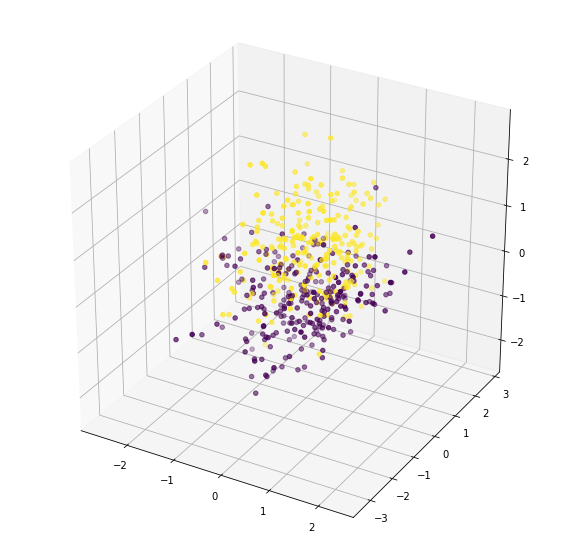

In [3]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c=y)

Now we will build the autoencoder for the data that we've just generated. 
This autoencoder has only one hidden layer for the encoder and one for the decoder.

Our goal here is to reduce the dimensionality of the date from the $\mathcal{R}^3$ to $\mathcal{R}^2$.

In [4]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model

encoding_dim = 2

input_layer = keras.Input(shape=(3,))
encoded = layers.Dense(encoding_dim, activation="sigmoid")(input_layer)
decoded = layers.Dense(3, activation="sigmoid")(encoded)
autoencoder = keras.Model(input_layer, decoded)

We need to build separate models for the encoder and the decoder in order to evaluate their quality.

In [5]:
encoder = keras.Model(input_layer, encoded)

encoded_input = keras.Input(shape=(encoding_dim,)) #the size of the encoder output

decoder_layer = autoencoder.layers[-1]

decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

We will train our model using the MSE loss function and the stochastic gradient descent optimizer:

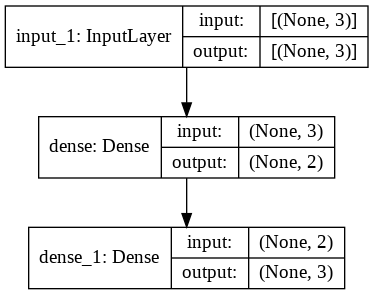

In [6]:
autoencoder.compile(loss="mse", optimizer="SGD")
plot_model(autoencoder, to_file='autoencoder.png', show_shapes=True)

We will perform the training of our model for 100 epochs

In [7]:
history = autoencoder.fit(X, X, epochs=100, verbose=0)

Now, we will check what the latent space may look like:

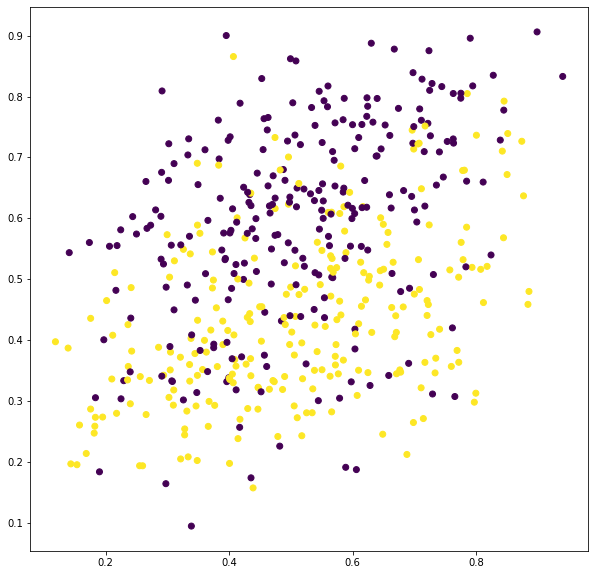

In [8]:
codings = encoder.predict(X)
fig = plt.figure(figsize=(10,10))
plt.scatter(codings[:,0], codings[:, 1], c=y)
plt.show()

### Exercises

Use the [Fashion MNIST](https://keras.io/api/datasets/fashion_mnist/) to build a simple autoencoder and perform the following tasks:
1. Try different values for the latent space size and report the diference in the reconstructed image (you will probably going to need to use better optimizers/loss functions). 
1. The [t-SNE](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding) is a very effective statistical method for visualizing high-dimensional data by giving each datapoint a location in a two or three-dimensional map. Try to visualize what the Latent Space looks like using the [scikit-learn implementation](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html).
  1. By looking at the t-SNE for the Latent Space, do you think that Autoencoders are a good tool for generating data?